In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
taxi_tickets = pd.read_csv('taxi_tickets_ward_clean.csv')
print(taxi_tickets.shape)
print(taxi_tickets.dtypes)
taxi_tickets.head()

(261936, 16)
Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
dtype: object


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
0,55884862,4079TX,IL,TXI,FORD,01/02/2009 10:05 am,5210 N BROADWAY,0964190,EXPIRED METER OR OVERSTAY,8117,20,Paid,Did Not Challenge,41.976507,-87.659944,48
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38
3,9177658970,25368TX,IL,TXI,OLDS,01/10/2009 10:30 am,6410 N CLAREMONT AV,0964190,EXPIRED METER OR OVERSTAY,197,498,Paid,Did Not Challenge,41.997942,-87.688741,50
4,55835485,3001TX,IL,TXI,FORD,01/01/2009 06:35 pm,36 W 26TH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,19503,21,Bankruptcy,Did Not Challenge,41.845162,-87.628529,3


## Challenging Tickets

### The majority of drivers (58.6%) who were given a ticket did not challenge it

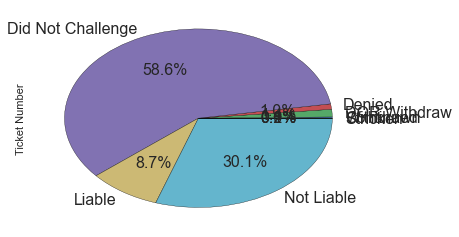

In [3]:
taxi_tickets_hearing = taxi_tickets.groupby(['Hearing Dispo'])['Ticket Number'].count()
taxi_tickets_hearing.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

### Out of those who challenged it though, 72.7% were found not liable for the ticket

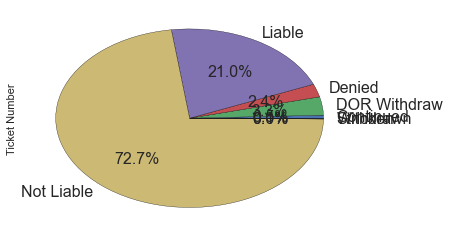

In [4]:
taxi_challenged = taxi_tickets[taxi_tickets['Hearing Dispo'] != 'Did Not Challenge']
taxi_challenge_hearing = taxi_challenged.groupby(['Hearing Dispo'])['Ticket Number'].count()
taxi_challenge_hearing.plot(kind='pie',autopct='%1.1f%%',fontsize=16)

## Residential and Street Parking 

### For residential and business street parking violations alone, a higher percentage (68.5% vs. 58.6% for all tickets) of drivers did not challenge their tickets

In [5]:
taxi_bus_res = taxi_tickets[taxi_tickets['Violation Code'].isin(['0964170A','0964170B'])]

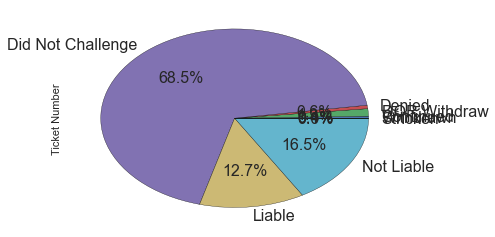

In [6]:
taxi_st_hearing = taxi_bus_res.groupby(['Hearing Dispo'])['Ticket Number'].count()
taxi_st_hearing.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

### Additionally, for these two types of ticket violations, a lower percentage of drivers were successful at a hearing, with 52.2% of drivers being deemed Not Liable, vs. 72.7% of drivers for tickets overall

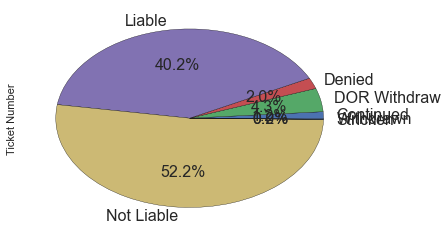

In [7]:
taxi_st_challenged = taxi_bus_res[taxi_bus_res['Hearing Dispo'] != 'Did Not Challenge']
taxi_st_chal_hearing = taxi_st_challenged.groupby(['Hearing Dispo'])['Ticket Number'].count()
taxi_st_chal_hearing.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

### Challenges By Category

In [8]:
# Getting the top 25 categories to look at challenge rates to ignore much less common tickets
top_categories = taxi_tickets.groupby(['Violation Description'])['Ticket Number'].count()
top_categories = top_categories.sort_values(ascending=False)
top_25_categories = top_categories.index[:25].tolist()

In [9]:
top_category_tickets = taxi_tickets[taxi_tickets['Violation Description'].isin(top_25_categories)]
category_hearings = top_category_tickets.groupby(['Violation Description', 'Hearing Dispo'])['Ticket Number'].count()
viol_hearing_pct = pd.DataFrame(category_hearings).reset_index()
viol_hearing_pct['Percent'] = viol_hearing_pct.groupby('Violation Description')['Ticket Number'].apply(lambda x: x.astype(float)/x.sum() * 100)
viol_hearing_pct.head()

,Violation Description,Hearing Dispo,Ticket Number,Percent
0,3-7 AM SNOW ROUTE,Continued,1,0.139470
1,3-7 AM SNOW ROUTE,DOR Withdraw,11,1.534170
2,3-7 AM SNOW ROUTE,Denied,1,0.139470
3,3-7 AM SNOW ROUTE,Did Not Challenge,559,77.963738
4,3-7 AM SNOW ROUTE,Liable,73,10.181311


In [10]:
not_challenged_cat = viol_hearing_pct[viol_hearing_pct['Hearing Dispo'] == 'Did Not Challenge']
not_challenged_cat = not_challenged_cat[['Violation Description', 'Percent']].sort_values(['Percent'], ascending=False)
not_challenged_cat.head()

,Violation Description,Percent
146,STREET CLEANING,80.784173
35,EXP. METER NON-CENTRAL BUSINESS DISTRICT,78.859316
3,3-7 AM SNOW ROUTE,77.963738
48,EXPIRED METER OR OVERSTAY,77.673422
56,EXPIRED PLATES OR TEMPORARY REGISTRATION,77.636917


### Out of the 25 most common types of tickets received by taxis, residential and business street parking are 8th and 11th in the amount of tickets that go unchallenged, with 69.9% and 64.0% respectively going unchallenged

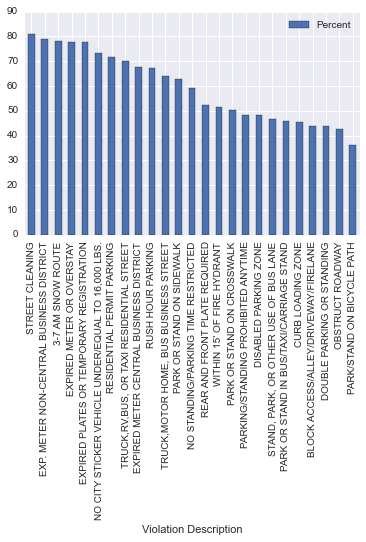

In [11]:
not_challenged_cat.plot(x='Violation Description', y='Percent', kind='bar')

### Additionally, part of the reason for these tickets being relatively not likely to be challenged is that business street parking tickets are the most likely for a driver to be held liable for if challenged, and residential parking is 6th most likely. 

### The average outcome (including tickets Not Challenged) for business street parking tickets was Liable 16.2% of the time, and it was 11.5% for residential street parking tickets

In [12]:
liable_cat = viol_hearing_pct[viol_hearing_pct['Hearing Dispo'] == 'Liable']
liable_cat = liable_cat[['Violation Description', 'Percent']].sort_values(['Percent'], ascending=False)
liable_cat[:10]

,Violation Description,Percent
155,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",16.205315
100,PARK OR STAND ON SIDEWALK,15.113350
43,EXPIRED METER CENTRAL BUSINESS DISTRICT,13.067499
23,DISABLED PARKING ZONE,12.352941
49,EXPIRED METER OR OVERSTAY,11.649366
162,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",11.533149
127,RESIDENTIAL PERMIT PARKING,11.445148
170,WITHIN 15' OF FIRE HYDRANT,11.389052
107,PARK/STAND ON BICYCLE PATH,10.187668
4,3-7 AM SNOW ROUTE,10.181311


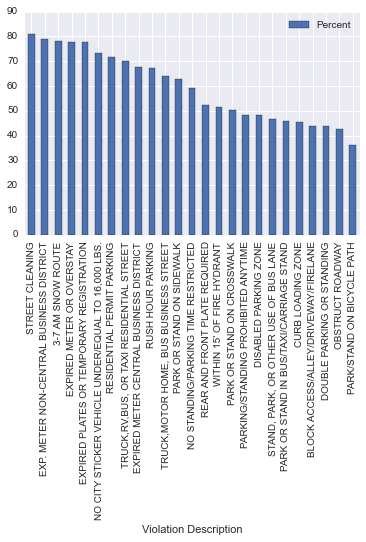

In [13]:
not_challenged_cat.plot(x='Violation Description', y='Percent', kind='bar')

### Looking at percentages of outcomes by category

### Both business and residential street parking tickets were less likely than many of the other top 25 categories for drivers to result in a Not Liable hearing. Business street parking tickets led to Not Liable 17.5% of the time, while residential were Not Liable 14.2% of the time

In [14]:
not_liable_cat = viol_hearing_pct[viol_hearing_pct['Hearing Dispo'] == 'Not Liable']
not_liable_cat = not_liable_cat[['Violation Description', 'Percent']].sort_values(['Percent'])
not_liable_cat[:15]

,Violation Description,Percent
50,EXPIRED METER OR OVERSTAY,8.425331
148,STREET CLEANING,8.741007
37,EXP. METER NON-CENTRAL BUSINESS DISTRICT,9.007182
5,3-7 AM SNOW ROUTE,10.041841
65,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",10.460251
58,EXPIRED PLATES OR TEMPORARY REGISTRATION,10.547667
128,RESIDENTIAL PERMIT PARKING,14.240506
44,EXPIRED METER CENTRAL BUSINESS DISTRICT,16.022099
163,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",16.116738
101,PARK OR STAND ON SIDEWALK,17.002519
